<a href="https://colab.research.google.com/github/OziomaEunice/Sentiment_GPT/blob/develop5/Na%C3%AFveBayes_SentimentAnalysis3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naïve Bayes for Sentiment Analysis**

In [ ]:
# install the necessary libraries
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install nltk
! pip install openpyxl # for reading excel files

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import style
style.use('ggplot')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# Download the stopwords dataset
nltk.download('stopwords')

# Download wordnet dataset
nltk.download('wordnet')

# Download punkt dataset
nltk.download('punkt')

# Get the set of English stop words
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# since dataset is imported to my Google Colab (which will remain in here temporary)
# read excel file
df = pd.read_excel('/content/Tweets.xlsx') # for Twitter dataset
df2 = pd.read_excel('/content/IMDB_Dataset.xlsx') # for IMDb Movie Review dataset

In [ ]:
# check the number of rows and columns
df.shape

(14640, 15)

In [ ]:
df2.shape

(50000, 2)

In [ ]:
# show Twitter dataframe
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760512,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:00,NaN,Pacific Time (US & Canada)
2,570301083672813568,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:00,Lets Play,Central Time (US & Canada)
3,570301031407624192,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:00,NaN,Pacific Time (US & Canada)
4,570300817074462720,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:00,NaN,Pacific Time (US & Canada)
5,570300767074181120,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:00,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:00,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:00,Los Angeles,Pacific Time (US & Canada)
8,570299953286942720,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:00,San Diego,Pacific Time (US & Canada)
9,570295459631263744,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:00,Los Angeles,Eastern Time (US & Canada)


In [ ]:
# show IMDb dataset
df2.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
# datatype info
df.info()

print('\n***========================***\n')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [ ]:
# counting the number of missing values in the dataset
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df2.isnull().sum()

review       0
sentiment    0
dtype: int64

### **Visualisation (before preprocessing)**

#### **Twitter**

<ipython-input-216-198f1d195646>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette=['#99FF99', '#3399FF', '#FF6666'])


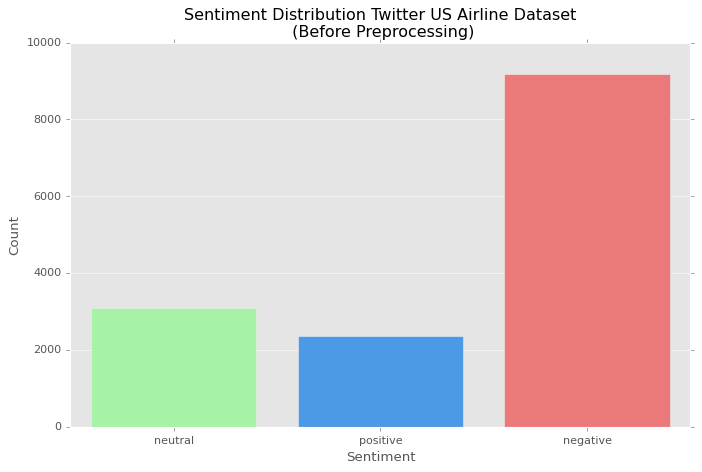

In [ ]:
# Visualize sentiment distribution before preprocessing
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=df, palette=['#99FF99', '#3399FF', '#FF6666'])
plt.title('Sentiment Distribution Twitter US Airline Dataset\n (Before Preprocessing)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

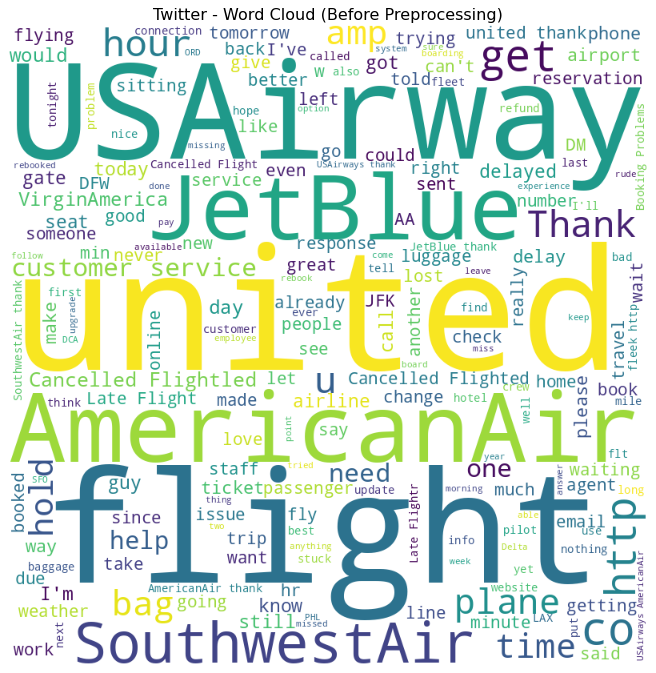

In [ ]:
# Visualise sentiment in wordcloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(text)

    # Plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()

# Visualize word cloud before preprocessing for Twitter dataset
generate_wordcloud(' '.join(df['text'].values), 'Twitter - Word Cloud (Before Preprocessing)')

#### **IMDb**

<ipython-input-218-cd1ab8ccf85f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df2, palette=['#3399FF', '#FF6666'])


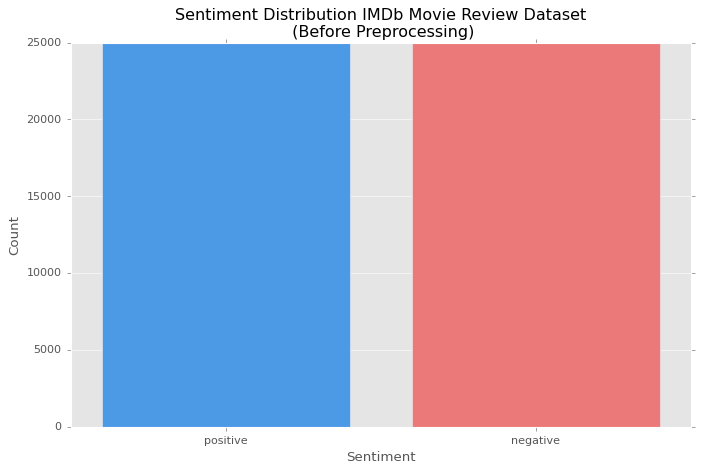

In [ ]:
# Visualize sentiment distribution before preprocessing
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df2, palette=['#3399FF', '#FF6666'])
plt.title('Sentiment Distribution IMDb Movie Review Dataset\n (Before Preprocessing)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

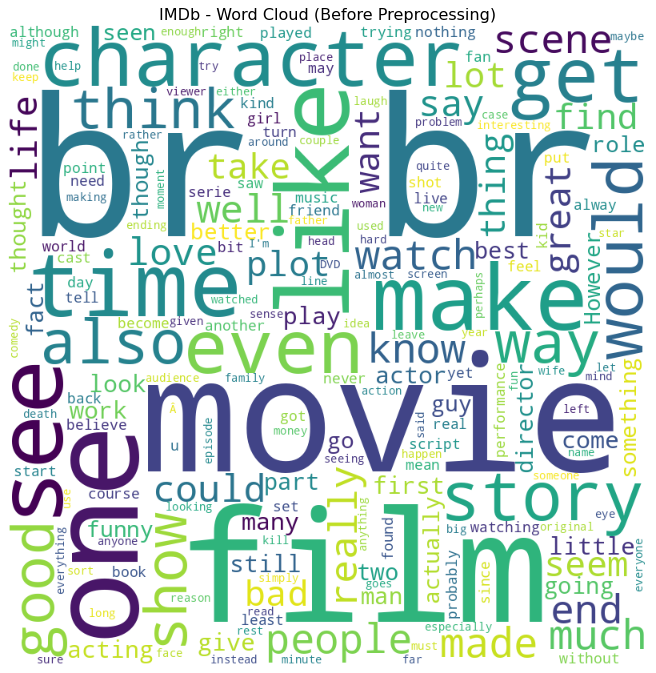

In [ ]:
# Visualize word cloud before preprocessing for IMDb dataset
generate_wordcloud(' '.join(df2['review'].values), 'IMDb - Word Cloud (Before Preprocessing)')

## **Preprocessing Dataset**

### **Handling Missing Values**

In [ ]:
# drop columns that are not needed for processing data
# In this case, for the Twitter dataset
df = df.drop(columns=['tweet_id', 'airline_sentiment_gold', 'negativereason', 'negativereason_confidence', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'])

In [ ]:
df.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
airline                         0
name                            0
text                            0
dtype: int64

In [ ]:
df.head(10)

,airline_sentiment,airline_sentiment_confidence,airline,name,text
0,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...
5,negative,1.0000,Virgin America,jnardino,@VirginAmerica seriously would pay $30 a fligh...
6,positive,0.6745,Virgin America,cjmcginnis,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,0.6340,Virgin America,pilot,@VirginAmerica Really missed a prime opportuni...
8,positive,0.6559,Virgin America,dhepburn,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,1.0000,Virgin America,YupitsTate,"@VirginAmerica it was amazing, and arrived an ..."


### **Cleaning Dataset**

In [ ]:
# clean (preprocess) the Twitter dataset
def cleanData1(text, min_word_length = 3):
  text = text.lower()
  text = re.sub(r'@[A-Za-z0-9]+', "", text) # this informs Python the the mentions in text must be substituted with an empty string
  text = re.sub(r'#', "", text) # removing #
  text = re.sub(r'RT[\s]+', "", text) # removing retweets
  text = re.sub(r'https?:\/\/\S+', "", text) # removing links
  text = ' '.join(word for word in text.split() if len(word) >= min_word_length and word not in stop_words) # Remove short words

  punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
  for p in punctuations:
      text = text.replace(p,'') #Removing punctuations

  # Lemmatize the words
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  text = ' '.join(lemmatized_words)

  return text

In [ ]:
# clean (preprocess) the IMDb Movie Review dataset
def cleanData2(review, min_word_length = 3):
  review = review.lower()
  review = re.sub(r'@[A-Za-z0-9]+', "", review) # this informs Python the the mentions in text must be substituted with an empty string
  review = re.sub(r'#', "", review) # removing #
  review = re.sub(r'RT[\s]+', "", review) # removing retweets
  review = re.sub(r'https?:\/\/\S+', "", review) # removing links
  review = ' '.join(word for word in review.split() if len(word) >= min_word_length and word not in stop_words) # Remove short words

  punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
  for p in punctuations:
      review = review.replace(p,'') #Removing punctuations

  # Lemmatize the words
  words = nltk.word_tokenize(review)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  review= ' '.join(lemmatized_words)

  return review

In [ ]:
# df['text'] = df['text'].apply(cleanData)

# Apply the cleanData function to all text columns in the dataframe
df = df.applymap(lambda x: cleanData1(x) if isinstance(x, str) else x)

In [ ]:
df2 = df2.applymap(lambda x: cleanData2(x) if isinstance(x, str) else x)

### **Visualisation (after preprocessing)**

#### **Twitter**

<ipython-input-227-5d0c5ce4bad3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette=['#99FF99', '#3399FF', '#FF6666'])


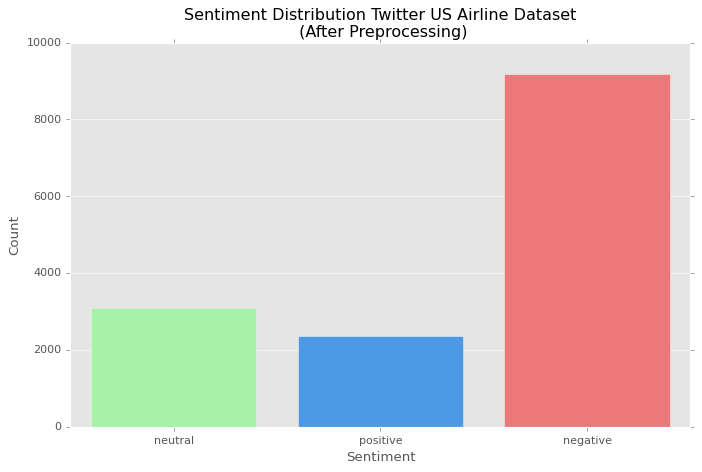

In [ ]:
# Visualize sentiment distribution before preprocessing
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=df, palette=['#99FF99', '#3399FF', '#FF6666'])
plt.title('Sentiment Distribution Twitter US Airline Dataset\n (After Preprocessing)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

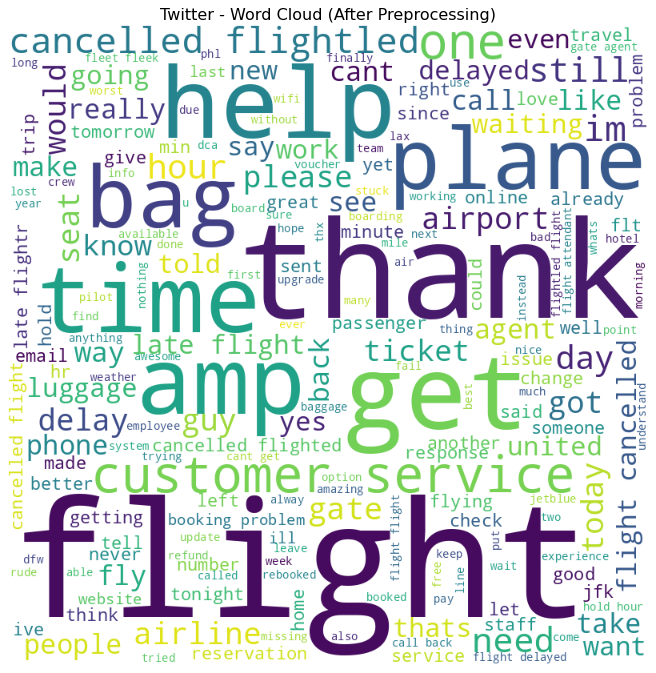

In [ ]:
# Visualize word cloud after preprocessing for Twitter dataset
generate_wordcloud(' '.join(df['text'].values), 'Twitter - Word Cloud (After Preprocessing)')

#### **IMDb**

<ipython-input-229-b6b69fe4d0a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df2, palette=['#3399FF', '#FF6666'])


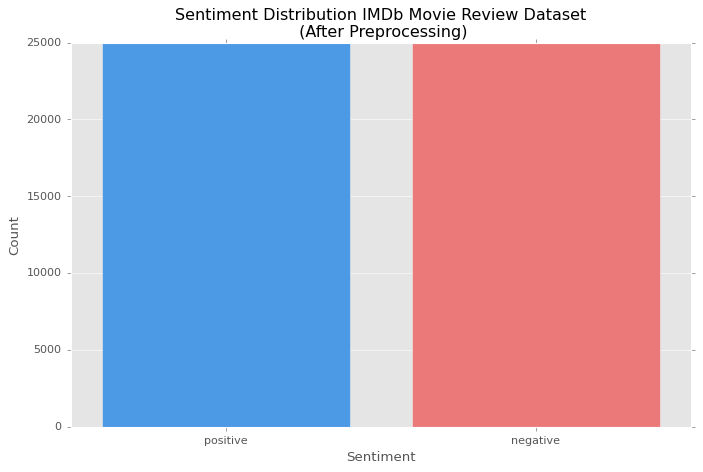

In [ ]:
# Visualize sentiment distribution after preprocessing
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df2, palette=['#3399FF', '#FF6666'])
plt.title('Sentiment Distribution IMDb Movie Review Dataset\n (After Preprocessing)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

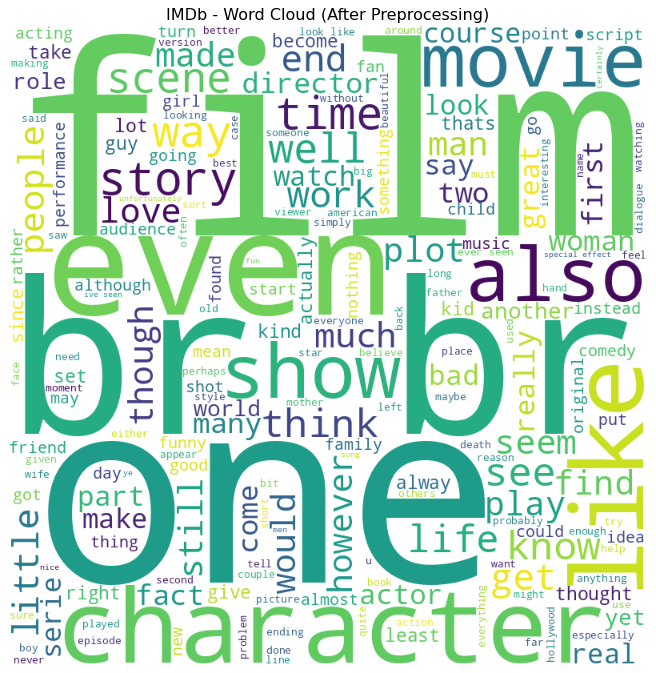

In [ ]:
# Visualize word cloud after preprocessing for IMDb dataset
generate_wordcloud(' '.join(df2['review'].values), 'IMDb - Word Cloud (After Preprocessing)')

### **Converting labels into integers or numeric values for ML**
**The purpose of this conversion is so that machines can understand the labels, since they aren't able to understand text data**

In [ ]:
# create a new column called data and link the airline_sentiment to it
# (this 'label' column will have numbers indicating 1, 0, -1
# (positive, neutral, negative)
df['label'] = df['airline_sentiment'].apply(lambda x: int(1) if str(x) == 'positive' else (0 if x == 'neutral' else -1))
df2['label'] = df2['sentiment'].apply(lambda x: int(1) if x == 'positive' else (0 if x == 'neutral' else -1))

In [ ]:
df[['airline_sentiment', 'text', 'label']].head(20)

,airline_sentiment,text,label
0,neutral,said,0
1,positive,plus added commercial experience tacky,1
2,neutral,today must mean need take another trip,0
3,negative,really aggressive blast obnoxious `` entertain...,-1
4,negative,really big bad thing,-1
5,negative,seriously would pay 30 flight seat playing rea...,-1
6,positive,"yes , nearly every time fly “ ear worm ” won ’...",1
7,neutral,really missed prime opportunity men without ha...,0
8,positive,"well , didnt…but do d",1
9,positive,"amazing , arrived hour early good me",1


## **Feature Extraction: TF-IDF Vectorisation**

### **Split the Dataset into Training and Testing**

In [ ]:
text_train, text_test, label_train, label_test = train_test_split(
                                          df['text'].values,
                                          df['label'].values,
                                          test_size = 0.5,
                                          random_state = 42,
                                          stratify=df['label'].values
                                      )

In [ ]:
print(len(text_train), len(text_test), len(label_train) , len(label_test))

7320 7320 7320 7320


### **TF-IDF**

In [ ]:
# Initialize the TF-IDF vectorizer and store it in a variable
tfidf_vector = TfidfVectorizer()

# Transform the training and testing sets for Twitter dataset
tfidf_train = tfidf_vector.fit_transform(text_train)
tfidf_test = tfidf_vector.transform(text_test)

## **Training NB**

In [ ]:
# train the Naïve Bayes (Multinomial) model
naive_bayes = MultinomialNB()

naive_bayes.fit(tfidf_train, label_train)

MultinomialNB()

## **Testing**

In [ ]:
# test the Naïve Bayes (Multinomial) model on Twitter dataset
predictions_twitter = naive_bayes.predict(tfidf_test)

print('==============================================')
print('\nClassification Report For Twitter Dataset\n')
print('==============================================')

accuracy = accuracy_score(label_test, predictions_twitter)
accuracy_perc = accuracy * 100

print(f"Accuracy on Twitter dataset: {accuracy_perc:.2f}%")
print('---------------------------\n')

# print(classification_report(label_test,predictions))
print(classification_report(label_test, predictions_twitter, zero_division=1))


Classification Report For Twitter Dataset

Accuracy on Twitter dataset: 67.62%
---------------------------

              precision    recall  f1-score   support

          -1       0.67      1.00      0.80      4589
           0       0.79      0.10      0.18      1550
           1       0.89      0.18      0.30      1181

    accuracy                           0.68      7320
   macro avg       0.78      0.43      0.43      7320
weighted avg       0.73      0.68      0.59      7320



In [ ]:
# test the Naïve Bayes (Multinomial) model on IMDb dataset
tfidf_test_imdb = tfidf_vector.transform(df2['review'].values)

predictions_imdb = naive_bayes.predict(tfidf_test_imdb)

print('==============================================')
print('\nClassification Report For IMDb Dataset\n')
print('==============================================')

accuracy = accuracy_score(df2['label'].values, predictions_imdb)
accuracy_perc = accuracy * 100

print(f"Accuracy on IMDb dataset: {accuracy_perc:.2f}%")
print('---------------------------\n')

# print(classification_report(label_test,predictions))
print(classification_report(df2['label'], predictions_imdb, zero_division=1))


Classification Report For IMDb Dataset

Accuracy on IMDb dataset: 50.43%
---------------------------

              precision    recall  f1-score   support

          -1       0.50      1.00      0.67     25000
           0       0.00      1.00      0.00         0
           1       0.98      0.01      0.02     25000

    accuracy                           0.50     50000
   macro avg       0.49      0.67      0.23     50000
weighted avg       0.74      0.50      0.34     50000



In [ ]:
df2.head(20)

,review,sentiment,label
0,one reviewer mentioned watching episode hooked...,positive,1
1,wonderful little production br br the filming ...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically there family little boy jake think t...,negative,-1
4,petter matteis `` love time money '' visually ...,positive,1
5,"probably alltime favorite movie , story selfle...",positive,1
6,sure would like see resurrection dated seahunt...,positive,1
7,"show amazing , fresh innovative idea 70 first ...",negative,-1
8,encouraged positive comment film looking forwa...,negative,-1
9,like original gut wrenching laughter like movi...,positive,1


### **Confusion Matrix**

In [ ]:
print(confusion_matrix(label_test, predictions_twitter))

[[4574   14    1]
 [1363  161   26]
 [ 936   30  215]]


In [ ]:
print(confusion_matrix(df2['label'], predictions_imdb))

[[24978    16     6]
 [    0     0     0]
 [24707    56   237]]


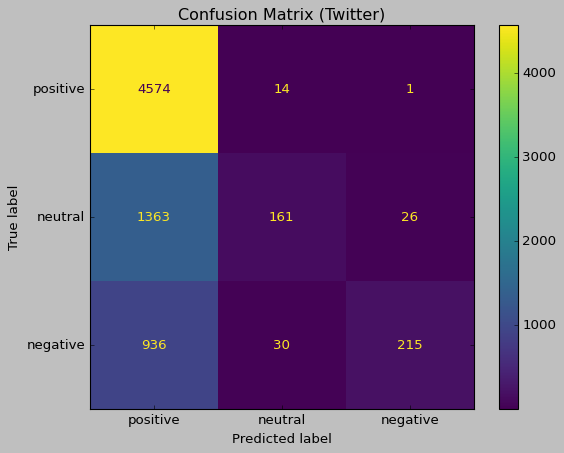

In [ ]:
style.use('classic')
cm = confusion_matrix(label_test, predictions_twitter)

# Display confusion matrix for Twitter
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
display_cm.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix (Twitter)')
plt.show()

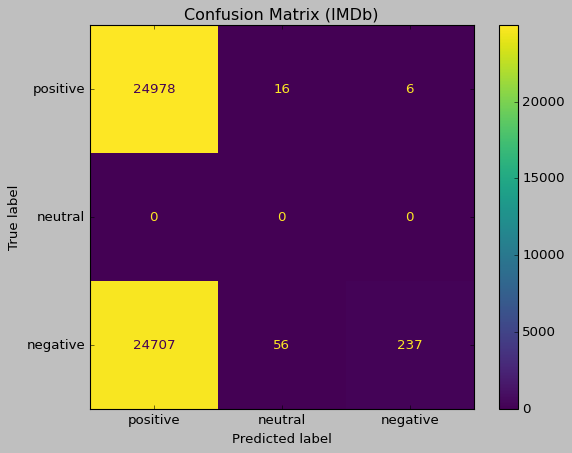

In [ ]:
style.use('classic')
cm = confusion_matrix(df2['label'], predictions_imdb)

# Display confusion matrix for IMDb
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
display_cm.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix (IMDb)')
plt.show()

## **Error Analysis**

#### **Twitter**

In [ ]:
# create an error analysis dataframe to
# compare the model's predictions with the true labels
error_analysis_df = pd.DataFrame({
    'Review': text_test,
    'True Label': label_test,
    'Predicted Label': predictions_twitter
})

In [ ]:
# identify misclassification
misclassifications = error_analysis_df[error_analysis_df['True Label'] != error_analysis_df['Predicted Label']]

In [ ]:
# display the first 5 misclassifications
for index, row in misclassifications.head(5).iterrows():
    print(f"Review: {row['Review']}")
    print(f"True Label: {row['True Label']}, Predicted Label: {row['Predicted Label']}")
    print('---')

Review: sign bonus enroll elevate
True Label: 0, Predicted Label: -1
---
Review: thanks responding
True Label: 1, Predicted Label: -1
---
Review: priv chat help chairman reroute
True Label: 0, Predicted Label: -1
---
Review: aww cool nice know still head then one faves
True Label: 1, Predicted Label: -1
---
Review: following now
True Label: 0, Predicted Label: -1
---


#### **IMDb**

In [ ]:
# create an error analysis dataframe to
# compare the model's predictions with the true labels
error_analysis_df2 = pd.DataFrame({
    'Review': df2['review'].values,
    'True Label': df2['label'].values,
    'Predicted Label': predictions_imdb
})

In [ ]:
# identify misclassification
misclassifications = error_analysis_df2[error_analysis_df2['True Label'] != error_analysis_df2['Predicted Label']]

In [ ]:
# display the first 5 misclassifications
for index, row in misclassifications.head(5).iterrows():
    print(f"Review: {row['Review']}")
    print(f"True Label: {row['True Label']}, Predicted Label: {row['Predicted Label']}")
    print('---')

Review: one reviewer mentioned watching episode hooked right , exactly happened mebr br the first thing struck brutality unflinching scene violence , set right word go trust me , show faint hearted timid show pull punch regard drug , sex violence hardcore , classic use wordbr br it called nickname given oswald maximum security state penitentary focus mainly emerald city , experimental section prison cell glass front face inwards , privacy high agenda city home manyaryans , muslim , gangsta , latino , christian , italian , irish moreso scuffle , death stare , dodgy dealing shady agreement never far awaybr br i would say main appeal show due fact go show dare forget pretty picture painted mainstream audience , forget charm , forget romanceoz mess around first episode ever saw struck nasty surreal , say ready it , watched more , developed taste oz , got accustomed high level graphic violence violence , injustice crooked guard wholl sold nickel , inmate wholl kill order get away it , well 

## **Hyperparameter**

### **Using GridSearchCV**

In [ ]:
# define the hyperparameter grid
parameter_grid ={
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}

In [ ]:
grid = GridSearchCV(naive_bayes, parameter_grid, cv=5)
grid.fit(tfidf_train, label_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_prior': [True, False]})

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid.best_params_)

# print how the model looks after hyper-parameter tuning
print("Best Estimator:", grid.best_estimator_)

Best Hyperparameters: {'alpha': 1, 'fit_prior': False}
Best Estimator: MultinomialNB(alpha=1, fit_prior=False)


In [ ]:
# Get the best Naïve Bayes model
best_nb_model = grid.best_estimator_

# --Test the best Naïve Bayes model --
# Twitter
tfidf_test = tfidf_vector.transform(text_test)
predictions_twitter_best = best_nb_model.predict(tfidf_test)
# IMDb
tfidf_test_imdb = tfidf_vector.transform(df2['review'].values)
predictions_imdb_best = best_nb_model.predict(tfidf_test_imdb)


Classification Report for Best Model For Twitter Dataset

Accuracy on Twitter dataset: 74.96%
---------------------------

              precision    recall  f1-score   support

          -1       0.76      0.95      0.85      4589
           0       0.70      0.32      0.44      1550
           1       0.71      0.52      0.60      1181

    accuracy                           0.75      7320
   macro avg       0.72      0.60      0.63      7320
weighted avg       0.74      0.75      0.72      7320



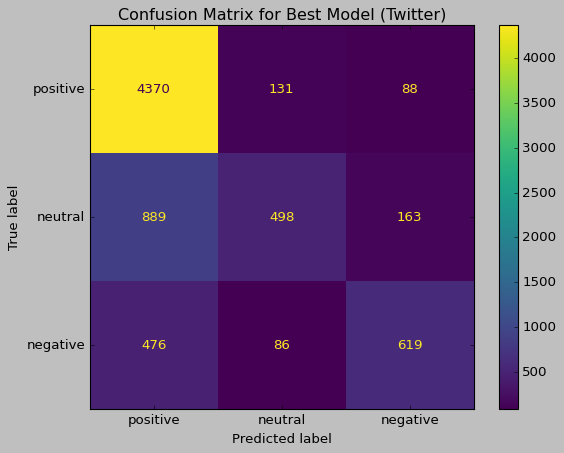

In [ ]:
# Display the classification report and confusion matrix for the best model for Twitter
print('\n==============================================')
print('Classification Report for Best Model For Twitter Dataset\n')
print('==============================================')

accuracy = accuracy_score(label_test, predictions_twitter_best)
accuracy_perc = accuracy * 100

print(f"Accuracy on Twitter dataset: {accuracy_perc:.2f}%")
print('---------------------------\n')

print(classification_report(label_test, predictions_twitter_best, zero_division=1))

# Calculate confusion matrix for best model
cm_best = confusion_matrix(label_test, predictions_twitter_best)

# Display confusion matrix for best model
display_cm_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['positive', 'neutral', 'negative'])
display_cm_best.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix for Best Model (Twitter)')
plt.show()


Classification Report for Best Model For IMDb Dataset

Accuracy on IMDb dataset: 57.41%
---------------------------

              precision    recall  f1-score   support

          -1       0.55      0.95      0.70     25000
           0       0.00      1.00      0.00         0
           1       0.86      0.20      0.32     25000

    accuracy                           0.57     50000
   macro avg       0.47      0.72      0.34     50000
weighted avg       0.71      0.57      0.51     50000



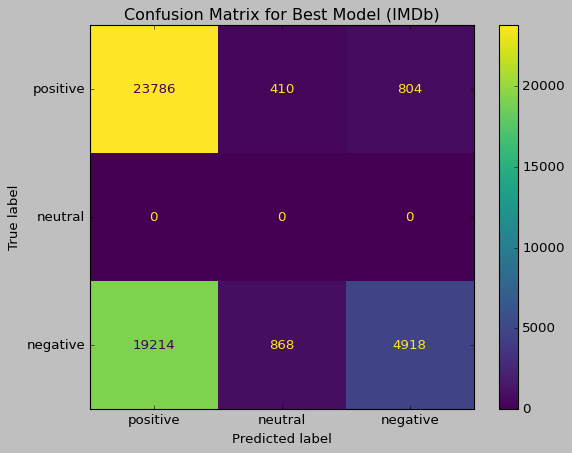

In [ ]:
# Display the classification report and confusion matrix for the best model for IMDb
print('\n==============================================')
print('Classification Report for Best Model For IMDb Dataset\n')
print('==============================================')

accuracy = accuracy_score(df2['label'].values, predictions_imdb_best)
accuracy_perc = accuracy * 100

print(f"Accuracy on IMDb dataset: {accuracy_perc:.2f}%")
print('---------------------------\n')

print(classification_report(df2['label'], predictions_imdb_best, zero_division=1))

# Calculate confusion matrix for best model
cm_best = confusion_matrix(df2['label'], predictions_imdb_best)

# Display confusion matrix for best model
display_cm_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=['positive', 'neutral', 'negative'])
display_cm_best.plot(cmap='viridis', values_format='d')

plt.title('Confusion Matrix for Best Model (IMDb)')
plt.show()